In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iono = pd.read_csv("/content/drive/MyDrive/ml/19-12-22/datasets/ionosphere1.csv")

In [ ]:
iono

,A,B,C,D,E,F,G,H,I,J,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
iono.columns[[2][0]]

'C'

In [ ]:
import time
st = time.time()
labels = np.array(iono)[:,-1]
k=len(set(labels))
k

2

In [ ]:
ionoarr= np.array(iono)[:,:-1]
ionoarr

array([[1, 0, 0.99539, ..., -0.54487, 0.18641, -0.453],
       [1, 0, 1.0, ..., -0.06288, -0.13738, -0.02447],
       [1, 0, 1.0, ..., -0.2418, 0.56045, -0.38238],
       ...,
       [1, 0, 0.94701, ..., 0.00442, 0.92697, -0.00577],
       [1, 0, 0.90608, ..., -0.03757, 0.87403, -0.16243],
       [1, 0, 0.8471, ..., -0.06678, 0.85764, -0.06151]], dtype=object)

In [ ]:
def kmean(a):
  b=np.sort(a)
  cluster=[]
  med=[]
  alt=0
  for i in range(2,k+1):
    alt=alt+1
    med.append(np.percentile(a,100*1*alt/k))
  med.sort()
  x=0
  y=0
  for j in range(len(b)):
    if(b[j]>med[x]):
      cluster.append(b[y:j])
      y=j
      x=x+1
      if(x>k-2):
        break
  cluster.append(b[y:])
  centroid=[0 for i in range(k)]
  sse=0
  for i in range(len(cluster)):
    centroid[i]=np.median(cluster[i])
    #print(np.sum(np.absolute((centroid[i]-cluster[i])**2)))
    sse=sse+np.sum((centroid[i]-cluster[i])**2)
  #print(sse)
  #print(centroid)
  #print(cluster)
  return sse/k
l=[]
sseval=[]
for i in range(len(ionoarr[0])):
  if(len(set(ionoarr[:,i]))<5):
    l.append([np.NaN,i])
  else:
    sseval.append(kmean(ionoarr[:,i]))
    l.append([kmean(ionoarr[:,i]),i])
l.sort()
print(l)
print(len(l))
threshold = (np.nanmin(sseval)+np.nanmax(sseval))/2
threshold
threshlist=[]#removed null values from list
for i in range(len(l)):
  if(l[i][0]==np.NaN):
    continue
  else:
    if(l[i][0]<len(l)):
      threshlist.append(l[i])
print(threshlist)
sixtyper=[]
ans=[]
for i in range(int(len(threshlist)*0.6)):
  sixtyper.append(threshlist[i])
  ans.append(threshlist[i][0])
sixtyper.sort()
print(sixtyper)
print(len(sixtyper))


[[nan, 0], [nan, 1], [15.116852722950005, 32], [16.90059816424998, 8], [17.682304695100033, 6], [20.799944544849986, 9], [20.881186349699988, 24], [21.07027640259999, 30], [21.23901525665002, 10], [21.33239618529999, 28], [21.661007545299988, 11], [21.855848388649996, 26], [21.895647792950015, 20], [21.914799843850016, 22], [22.07577284304996, 15], [23.330048276700047, 33], [23.42987675275003, 5], [23.764759198649994, 25], [24.162858745599998, 3], [24.17657735214999, 16], [24.18751959194998, 17], [24.43477712545001, 12], [24.60999974650003, 13], [25.084914286424986, 31], [25.459940659900013, 23], [25.904780756600008, 18], [25.918437876300004, 29], [26.82178732255001, 2], [26.836841948900002, 7], [26.904908145900006, 27], [27.216952548150008, 4], [27.321567462200008, 14], [27.411878002600005, 21], [27.53570945910004, 19]]
34
[[15.116852722950005, 32], [16.90059816424998, 8], [17.682304695100033, 6], [20.799944544849986, 9], [20.881186349699988, 24], [21.07027640259999, 30], [21.23901525

In [ ]:
for i in sixtyper:
  i.append(iono.columns[[i[1]][0]])
print(sixtyper)

[[15.116852722950005, 32, 'AG'], [16.90059816424998, 8, 'I'], [17.682304695100033, 6, 'G'], [20.799944544849986, 9, 'J'], [20.881186349699988, 24, 'Y'], [21.07027640259999, 30, 'AE'], [21.23901525665002, 10, 'K'], [21.33239618529999, 28, 'AC'], [21.661007545299988, 11, 'L'], [21.855848388649996, 26, 'AA'], [21.895647792950015, 20, 'U'], [21.914799843850016, 22, 'W'], [22.07577284304996, 15, 'P'], [23.330048276700047, 33, 'AH'], [23.42987675275003, 5, 'F'], [23.764759198649994, 25, 'Z'], [24.162858745599998, 3, 'D'], [24.17657735214999, 16, 'Q'], [24.18751959194998, 17, 'R']]


In [ ]:
xy=pd.DataFrame()
for i in sixtyper:
  xy[iono.columns[i[1]]]=iono[iono.columns[i[1]]]
xy

,AG,I,G,J,Y,AE,K,AC,L,AA,U,W,P,AH,F,Z,D,Q,R
0,0.18641,1.00000,0.83398,0.03760,0.56811,0.42267,0.85243,0.21266,-0.17755,0.41078,0.56971,0.36946,-0.38223,-0.45300,0.02306,-0.51171,-0.05889,0.84356,-0.38542
1,-0.13738,1.00000,-0.10868,-0.04549,-0.20332,-0.16626,0.50874,-0.19040,-0.67743,-0.20468,-0.13151,-0.18056,-0.97515,-0.02447,-0.36156,-0.26569,-0.18829,0.05499,-0.62237
2,0.56045,0.88965,1.00000,0.01198,0.57528,0.60436,0.73082,0.43100,0.05346,0.58984,0.70887,0.43385,0.00299,-0.38238,0.00485,-0.40220,-0.03365,0.83775,-0.13644
3,-0.32382,0.00000,0.71216,0.00000,1.00000,0.25682,0.00000,1.00000,0.00000,0.51613,-0.69975,0.00000,0.14516,1.00000,1.00000,0.90695,-0.45161,0.54094,-0.39330
4,-0.04608,0.77152,0.92106,-0.16399,0.03286,-0.05707,0.52798,0.02431,-0.20275,0.13290,0.05982,0.02309,-0.27457,-0.65697,0.06531,-0.65158,-0.02401,0.52940,-0.21780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.90546,0.90441,0.84349,-0.04622,0.95378,0.86660,0.89391,1.00000,0.13130,0.83479,0.87605,0.77521,-0.08929,-0.04307,-0.14706,-0.04202,0.08298,1.00000,-0.02101
347,0.91483,0.94590,0.93438,0.01606,0.94520,0.94066,0.96510,0.93159,0.03281,0.93522,0.92670,0.93124,-0.01326,0.04712,-0.02723,0.01361,0.00419,0.97173,0.00140
348,0.92697,0.95584,0.95177,0.02446,0.93988,0.92459,0.94124,0.92120,0.01766,0.92489,0.91406,0.89470,-0.01461,-0.00577,-0.03227,0.03193,-0.00034,0.94837,0.02004
349,0.87403,0.85746,0.95691,0.00110,0.91050,0.96022,0.89724,0.82983,-0.03315,0.89147,0.88729,0.92155,-0.04530,-0.16243,-0.01989,-0.02099,-0.01657,0.91381,-0.00884


In [ ]:
correlation_frame=xy.corr()
correlation_frame

,AG,I,G,J,Y,AE,K,AC,L,AA,U,W,P,AH,F,Z,D,Q,R
AG,1.000000,0.344814,0.545881,-0.203629,0.460692,0.692408,0.339506,0.579684,-0.181166,0.469326,0.616620,0.503426,-0.179906,-0.131840,0.016899,-0.085966,-0.153964,0.360039,-0.059076
I,0.344814,1.000000,0.461889,-0.251950,0.356564,0.316021,0.670813,0.329813,-0.167705,0.172210,0.492411,0.352218,-0.032689,-0.095597,-0.120712,0.107478,-0.302317,0.633574,0.200786
G,0.545881,0.461889,1.000000,-0.090268,0.286749,0.415216,0.412876,0.300632,-0.020395,0.097566,0.586627,0.373186,-0.021493,-0.076460,-0.010227,0.087734,-0.054030,0.379737,0.115927
J,-0.203629,-0.251950,-0.090268,1.000000,-0.254785,-0.155661,-0.337374,-0.123296,0.441505,-0.250947,-0.404818,-0.318463,0.334135,0.098104,0.200080,-0.043680,0.207697,-0.392047,0.130752
Y,0.460692,0.356564,0.286749,-0.254785,1.000000,0.516121,0.365821,0.650908,-0.233369,0.503526,0.553704,0.533583,-0.265366,0.111086,-0.177576,-0.077006,-0.104632,0.554071,-0.175657
AE,0.692408,0.316021,0.415216,-0.155661,0.516121,1.000000,0.294646,0.553855,-0.208855,0.376400,0.511278,0.538973,-0.183578,-0.037579,-0.100240,-0.162707,-0.172276,0.358692,-0.158096
K,0.339506,0.670813,0.412876,-0.337374,0.365821,0.294646,1.000000,0.396851,-0.217968,0.292281,0.518041,0.561689,-0.031705,-0.152225,-0.291447,0.131849,-0.190090,0.748290,0.107085
AC,0.579684,0.329813,0.300632,-0.123296,0.650908,0.553855,0.396851,1.000000,-0.208294,0.509070,0.479619,0.540443,-0.159639,0.082504,-0.029392,-0.113499,-0.041090,0.404276,-0.118047
L,-0.181166,-0.167705,-0.020395,0.441505,-0.233369,-0.208855,-0.217968,-0.208294,1.000000,-0.227890,-0.287651,-0.360763,0.356078,0.066584,0.163933,-0.076828,0.315877,-0.342053,0.077798
AA,0.469326,0.172210,0.097566,-0.250947,0.503526,0.376400,0.292281,0.509070,-0.227890,1.000000,0.398951,0.569176,-0.313300,0.082969,-0.175433,-0.011314,-0.046910,0.427263,-0.199799


In [ ]:
for i in range(len(correlation_frame)):
  for j in range(len(correlation_frame)):
    if(correlation_frame.iloc[i,j]<-0.7 or correlation_frame.iloc[i,j]>0.7):
      correlation_frame.iloc[i,j]=None
correlation_frame

,AG,I,G,J,Y,AE,K,AC,L,AA,U,W,P,AH,F,Z,D,Q,R
AG,NaN,0.344814,0.545881,-0.203629,0.460692,0.692408,0.339506,0.579684,-0.181166,0.469326,0.616620,0.503426,-0.179906,-0.131840,0.016899,-0.085966,-0.153964,0.360039,-0.059076
I,0.344814,NaN,0.461889,-0.251950,0.356564,0.316021,0.670813,0.329813,-0.167705,0.172210,0.492411,0.352218,-0.032689,-0.095597,-0.120712,0.107478,-0.302317,0.633574,0.200786
G,0.545881,0.461889,NaN,-0.090268,0.286749,0.415216,0.412876,0.300632,-0.020395,0.097566,0.586627,0.373186,-0.021493,-0.076460,-0.010227,0.087734,-0.054030,0.379737,0.115927
J,-0.203629,-0.251950,-0.090268,NaN,-0.254785,-0.155661,-0.337374,-0.123296,0.441505,-0.250947,-0.404818,-0.318463,0.334135,0.098104,0.200080,-0.043680,0.207697,-0.392047,0.130752
Y,0.460692,0.356564,0.286749,-0.254785,NaN,0.516121,0.365821,0.650908,-0.233369,0.503526,0.553704,0.533583,-0.265366,0.111086,-0.177576,-0.077006,-0.104632,0.554071,-0.175657
AE,0.692408,0.316021,0.415216,-0.155661,0.516121,NaN,0.294646,0.553855,-0.208855,0.376400,0.511278,0.538973,-0.183578,-0.037579,-0.100240,-0.162707,-0.172276,0.358692,-0.158096
K,0.339506,0.670813,0.412876,-0.337374,0.365821,0.294646,NaN,0.396851,-0.217968,0.292281,0.518041,0.561689,-0.031705,-0.152225,-0.291447,0.131849,-0.190090,NaN,0.107085
AC,0.579684,0.329813,0.300632,-0.123296,0.650908,0.553855,0.396851,NaN,-0.208294,0.509070,0.479619,0.540443,-0.159639,0.082504,-0.029392,-0.113499,-0.041090,0.404276,-0.118047
L,-0.181166,-0.167705,-0.020395,0.441505,-0.233369,-0.208855,-0.217968,-0.208294,NaN,-0.227890,-0.287651,-0.360763,0.356078,0.066584,0.163933,-0.076828,0.315877,-0.342053,0.077798
AA,0.469326,0.172210,0.097566,-0.250947,0.503526,0.376400,0.292281,0.509070,-0.227890,NaN,0.398951,0.569176,-0.313300,0.082969,-0.175433,-0.011314,-0.046910,0.427263,-0.199799


In [ ]:
len(correlation_frame)

19

In [ ]:
drop=[]
for i in range(len(correlation_frame)):
  l=np.array(correlation_frame[correlation_frame.columns[i:i+1]])
  if(np.count_nonzero(np.isnan(l))>1):
    drop.append(correlation_frame.columns[i:i+1][0])
    break
len(drop)
drop

['K']

In [ ]:
eliminated=xy.drop("K",axis=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
eliminated[eliminated.columns[0:len(eliminated.columns)]]

,AG,I,G,J,Y,AE,AC,L,AA,U,W,P,AH,F,Z,D,Q,R
0,0.18641,1.00000,0.83398,0.03760,0.56811,0.42267,0.21266,-0.17755,0.41078,0.56971,0.36946,-0.38223,-0.45300,0.02306,-0.51171,-0.05889,0.84356,-0.38542
1,-0.13738,1.00000,-0.10868,-0.04549,-0.20332,-0.16626,-0.19040,-0.67743,-0.20468,-0.13151,-0.18056,-0.97515,-0.02447,-0.36156,-0.26569,-0.18829,0.05499,-0.62237
2,0.56045,0.88965,1.00000,0.01198,0.57528,0.60436,0.43100,0.05346,0.58984,0.70887,0.43385,0.00299,-0.38238,0.00485,-0.40220,-0.03365,0.83775,-0.13644
3,-0.32382,0.00000,0.71216,0.00000,1.00000,0.25682,1.00000,0.00000,0.51613,-0.69975,0.00000,0.14516,1.00000,1.00000,0.90695,-0.45161,0.54094,-0.39330
4,-0.04608,0.77152,0.92106,-0.16399,0.03286,-0.05707,0.02431,-0.20275,0.13290,0.05982,0.02309,-0.27457,-0.65697,0.06531,-0.65158,-0.02401,0.52940,-0.21780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.90546,0.90441,0.84349,-0.04622,0.95378,0.86660,1.00000,0.13130,0.83479,0.87605,0.77521,-0.08929,-0.04307,-0.14706,-0.04202,0.08298,1.00000,-0.02101
347,0.91483,0.94590,0.93438,0.01606,0.94520,0.94066,0.93159,0.03281,0.93522,0.92670,0.93124,-0.01326,0.04712,-0.02723,0.01361,0.00419,0.97173,0.00140
348,0.92697,0.95584,0.95177,0.02446,0.93988,0.92459,0.92120,0.01766,0.92489,0.91406,0.89470,-0.01461,-0.00577,-0.03227,0.03193,-0.00034,0.94837,0.02004
349,0.87403,0.85746,0.95691,0.00110,0.91050,0.96022,0.82983,-0.03315,0.89147,0.88729,0.92155,-0.04530,-0.16243,-0.01989,-0.02099,-0.01657,0.91381,-0.00884


In [ ]:
clf.fit(eliminated[eliminated.columns[0:len(eliminated.columns)]],labels)

GaussianNB()

In [ ]:
labels.dtype

dtype('O')

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
accur=[]
for i in range(1,len(eliminated.columns)):  
  X_train, X_test, y_train, y_test = train_test_split(eliminated[eliminated.columns[0:i]],labels , test_size=0.4, random_state=1)
  
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  accur.append([metrics.accuracy_score(y_test, y_pred)*100,str(i+1)+"features",[eliminated.columns[j:j+1][0] for j in range(i+1)]])
print(accur)
print(len(accur))

Gaussian Naive Bayes model accuracy(in %): 63.829787234042556
Gaussian Naive Bayes model accuracy(in %): 73.75886524822694
Gaussian Naive Bayes model accuracy(in %): 81.56028368794325
Gaussian Naive Bayes model accuracy(in %): 82.26950354609929
Gaussian Naive Bayes model accuracy(in %): 83.68794326241135
Gaussian Naive Bayes model accuracy(in %): 83.68794326241135
Gaussian Naive Bayes model accuracy(in %): 85.1063829787234
Gaussian Naive Bayes model accuracy(in %): 85.1063829787234
Gaussian Naive Bayes model accuracy(in %): 85.81560283687944
Gaussian Naive Bayes model accuracy(in %): 85.81560283687944
Gaussian Naive Bayes model accuracy(in %): 83.68794326241135
Gaussian Naive Bayes model accuracy(in %): 83.68794326241135
Gaussian Naive Bayes model accuracy(in %): 83.68794326241135
Gaussian Naive Bayes model accuracy(in %): 82.26950354609929
Gaussian Naive Bayes model accuracy(in %): 78.72340425531915
Gaussian Naive Bayes model accuracy(in %): 82.26950354609929
Gaussian Naive Bayes mode

In [ ]:
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 1.648575782775879 seconds


In [ ]:
#print(metrics.accuracy_score(eliminated[eliminated[0:7]],y_test)*100)

In [ ]:
from collections import Counter
import math
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [ ]:
def split(dataset, column):
    split_data = []
    col_vals = iono[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)
l=[]
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove('A')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['A'] for dataframe in split_data]
        gain = information_gain(dataset['A'], split_labels)
        l.append([gain,iono.columns.get_loc(feature)])
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

new_data = split(iono, find_best_split(iono)[0]) # contains a list of dataframes after splitting
print(l)
l.sort()

AB 0.28866052426106176
[[0.0, 1], [0.19857342162537336, 2], [0.2695307069466863, 3], [0.15471141806422958, 4], [0.24094180917146737, 5], [0.2023848934594987, 6], [0.2387605141959958, 7], [0.22617912719523364, 8], [0.26388817333636827, 9], [0.22436199697720235, 10], [0.2589663858984042, 11], [0.2077675614500588, 12], [0.2727639853733735, 13], [0.20879183435347565, 14], [0.2585598315327018, 15], [0.23299316537672965, 16], [0.2880356036549191, 17], [0.2475578809774769, 18], [0.2557721331689399, 19], [0.23452382531952332, 20], [0.2543323896789757, 21], [0.21726018327405888, 22], [0.25490494877976766, 23], [0.23086957324692237, 24], [0.2862878599046882, 25], [0.2280135454828656, 26], [0.28866052426106176, 27], [0.21028612143006575, 28], [0.25793044700571477, 29], [0.2132083043399578, 30], [0.25183314043064314, 31], [0.22095699893370874, 32], [0.24563055885219884, 33], [0.17759734278086592, 34]]


In [ ]:
l.sort()
l.reverse()
for i in l:
  i.append(iono.columns[[i[1]][0]])
print(l)

[[0.28866052426106176, 27, 'AB'], [0.2880356036549191, 17, 'R'], [0.2862878599046882, 25, 'Z'], [0.2727639853733735, 13, 'N'], [0.2695307069466863, 3, 'D'], [0.26388817333636827, 9, 'J'], [0.2589663858984042, 11, 'L'], [0.2585598315327018, 15, 'P'], [0.25793044700571477, 29, 'AD'], [0.2557721331689399, 19, 'T'], [0.25490494877976766, 23, 'X'], [0.2543323896789757, 21, 'V'], [0.25183314043064314, 31, 'AF'], [0.2475578809774769, 18, 'S'], [0.24563055885219884, 33, 'AH'], [0.24094180917146737, 5, 'F'], [0.2387605141959958, 7, 'H'], [0.23452382531952332, 20, 'U'], [0.23299316537672965, 16, 'Q'], [0.23086957324692237, 24, 'Y'], [0.2280135454828656, 26, 'AA'], [0.22617912719523364, 8, 'I'], [0.22436199697720235, 10, 'K'], [0.22095699893370874, 32, 'AG'], [0.21726018327405888, 22, 'W'], [0.2132083043399578, 30, 'AE'], [0.21028612143006575, 28, 'AC'], [0.20879183435347565, 14, 'O'], [0.2077675614500588, 12, 'M'], [0.2023848934594987, 6, 'G'], [0.19857342162537336, 2, 'C'], [0.17759734278086592

In [ ]:
'''[[nan, 0], [nan, 1], [15.116852722950005, 32], [16.90059816424998, 8], [17.682304695100033, 6], [20.799944544849986, 9], [20.881186349699988, 24], [21.07027640259999, 30], [21.23901525665002, 10], [21.33239618529999, 28], [21.661007545299988, 11], [21.855848388649996, 26], [21.895647792950015, 20], [21.914799843850016, 22], [22.07577284304996, 15], [23.330048276700047, 33], [23.42987675275003, 5], [23.764759198649994, 25], [24.162858745599998, 3], [24.17657735214999, 16], [24.18751959194998, 17], [24.43477712545001, 12], [24.60999974650003, 13], [25.084914286424986, 31], [25.459940659900013, 23], [25.904780756600008, 18], [25.918437876300004, 29], [26.82178732255001, 2], [26.836841948900002, 7], [26.904908145900006, 27], [27.216952548150008, 4], [27.321567462200008, 14], [27.411878002600005, 21], [27.53570945910004, 19]]'''

'[[nan, 0], [nan, 1], [15.116852722950005, 32], [16.90059816424998, 8], [17.682304695100033, 6], [20.799944544849986, 9], [20.881186349699988, 24], [21.07027640259999, 30], [21.23901525665002, 10], [21.33239618529999, 28], [21.661007545299988, 11], [21.855848388649996, 26], [21.895647792950015, 20], [21.914799843850016, 22], [22.07577284304996, 15], [23.330048276700047, 33], [23.42987675275003, 5], [23.764759198649994, 25], [24.162858745599998, 3], [24.17657735214999, 16], [24.18751959194998, 17], [24.43477712545001, 12], [24.60999974650003, 13], [25.084914286424986, 31], [25.459940659900013, 23], [25.904780756600008, 18], [25.918437876300004, 29], [26.82178732255001, 2], [26.836841948900002, 7], [26.904908145900006, 27], [27.216952548150008, 4], [27.321567462200008, 14], [27.411878002600005, 21], [27.53570945910004, 19]]'

In [ ]:
xyz=pd.DataFrame()
for i in l:
  xyz[iono[iono.columns[i[1]:i[1]+1]].columns[0]]=iono[iono.columns[i[1]:i[1]+1]]
xyz

,AB,R,Z,N,D,J,L,P,AD,T,...,W,AE,AC,O,M,G,C,AI,E,B
0,-0.46168,-0.38542,-0.51171,-0.44945,-0.05889,0.03760,-0.17755,-0.38223,-0.34090,-0.32192,...,0.36946,0.42267,0.21266,0.60536,0.59755,0.83398,0.99539,g,0.85243,0
1,-0.18401,-0.62237,-0.26569,-0.69707,-0.18829,-0.04549,-0.67743,-0.97515,-0.11593,-1.00000,...,-0.18056,-0.16626,-0.19040,-0.51685,0.34432,-0.10868,1.00000,b,0.93035,0
2,-0.22145,-0.13644,-0.40220,0.00827,-0.03365,0.01198,0.05346,0.00299,-0.17365,-0.08540,...,0.43385,0.60436,0.43100,0.54591,0.85443,1.00000,1.00000,g,1.00000,0
3,1.00000,-0.39330,0.90695,0.00000,-0.45161,0.00000,0.00000,0.14516,-0.20099,-0.54467,...,0.00000,0.25682,1.00000,-1.00000,0.00000,0.71216,1.00000,b,1.00000,0
4,-0.53206,-0.21780,-0.65158,-0.00712,-0.02401,-0.16399,-0.20275,-0.27457,-0.62197,-0.17813,...,0.02309,-0.05707,0.02431,0.34395,0.56409,0.92106,1.00000,g,0.94140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.00123,-0.02101,-0.04202,0.06723,0.08298,-0.04622,0.13130,-0.08929,0.12815,0.06618,...,0.77521,0.86660,1.00000,0.79307,0.81197,0.84349,0.83508,g,0.73739,0
347,0.04925,0.00140,0.01361,0.07330,0.00419,0.01606,0.03281,-0.01326,0.08168,0.06038,...,0.93124,0.94066,0.93159,0.94625,0.94171,0.93438,0.95113,g,0.95183,0
348,0.02542,0.02004,0.03193,0.04688,-0.00034,0.02446,0.01766,-0.01461,0.02242,0.01393,...,0.89470,0.92459,0.92120,0.93954,0.92595,0.95177,0.94701,g,0.93207,0
349,-0.07760,-0.00884,-0.02099,-0.01436,-0.01657,0.00110,-0.03315,-0.04530,-0.17238,-0.12928,...,0.92155,0.96022,0.82983,0.90608,0.89061,0.95691,0.90608,g,0.98122,0


In [ ]:
accur1=[]
for i in range(1,32):  
  X_train, X_test, y_train, y_test = train_test_split(xyz[xyz.columns[0:i]],labels , test_size=0.4, random_state=1)

  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  accur1.append([metrics.accuracy_score(y_test, y_pred)*100,str(i)+"features",[xyz.columns[j:j+1][0] for j in range(i+1)]])
print(accur1)

Gaussian Naive Bayes model accuracy(in %): 75.88652482269504
Gaussian Naive Bayes model accuracy(in %): 75.88652482269504
Gaussian Naive Bayes model accuracy(in %): 70.92198581560284
Gaussian Naive Bayes model accuracy(in %): 73.75886524822694
Gaussian Naive Bayes model accuracy(in %): 78.72340425531915
Gaussian Naive Bayes model accuracy(in %): 80.1418439716312
Gaussian Naive Bayes model accuracy(in %): 79.43262411347519
Gaussian Naive Bayes model accuracy(in %): 79.43262411347519
Gaussian Naive Bayes model accuracy(in %): 75.88652482269504
Gaussian Naive Bayes model accuracy(in %): 75.88652482269504
Gaussian Naive Bayes model accuracy(in %): 74.46808510638297
Gaussian Naive Bayes model accuracy(in %): 73.75886524822694
Gaussian Naive Bayes model accuracy(in %): 71.63120567375887
Gaussian Naive Bayes model accuracy(in %): 72.3404255319149
Gaussian Naive Bayes model accuracy(in %): 69.50354609929079
Gaussian Naive Bayes model accuracy(in %): 71.63120567375887
Gaussian Naive Bayes model

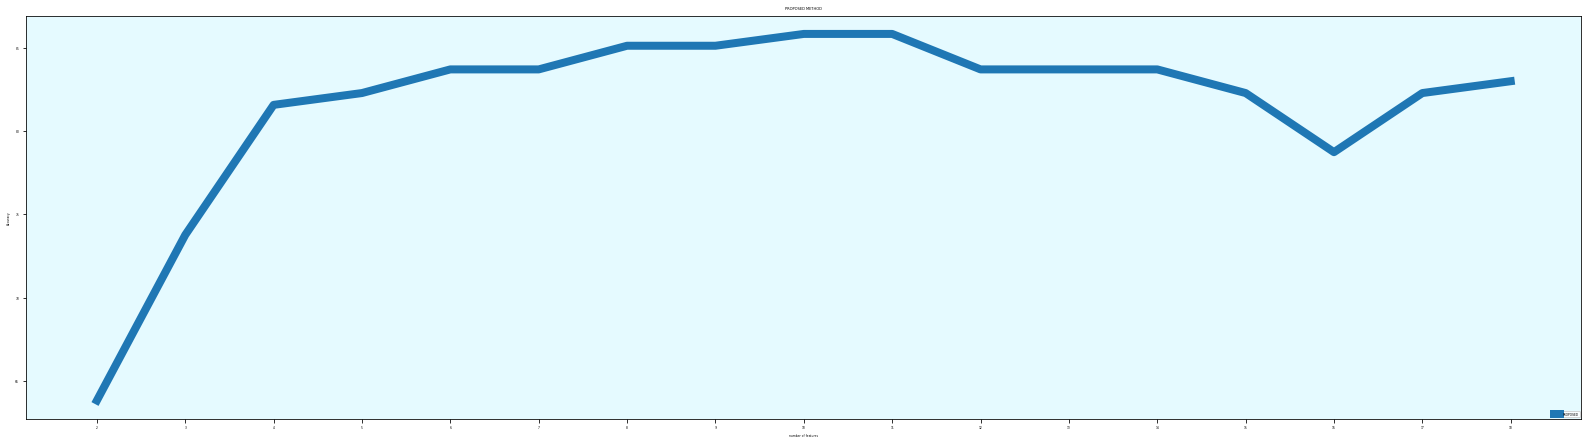

In [ ]:
import matplotlib
plt.rcParams['figure.figsize'] = [27, 7]
matplotlib.rcParams['font.family'] = 'Comic Sans MS'
plt.rc('font', size=3) 
y1=[accur[i][0] for i in range(len(accur))]
x1=[len(accur[i][2]) for i in range(len(accur))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("PROPOSED METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur[i][2]) for i in range(len(accur))])
ax.set_xticklabels([str(len(accur[i][2])) for i in range(len(accur))])
plt.legend(loc='lower right', ncol=1)
plt.show()

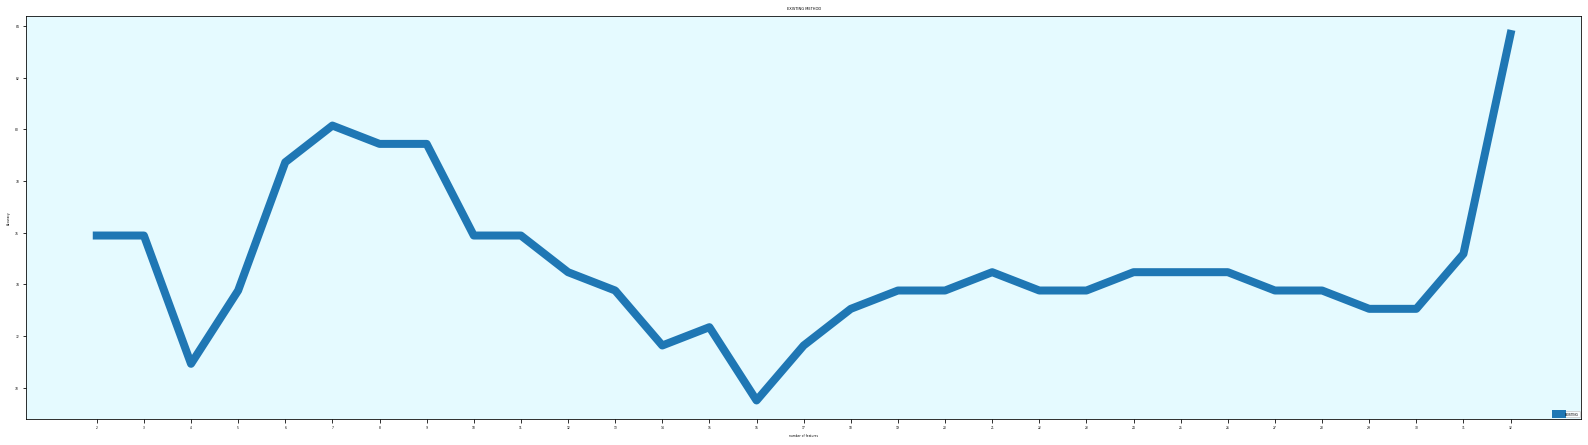

In [ ]:
y2=[accur1[i][0] for i in range(len(accur1))]
x2=[len(accur1[i][2]) for i in range(len(accur1))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()

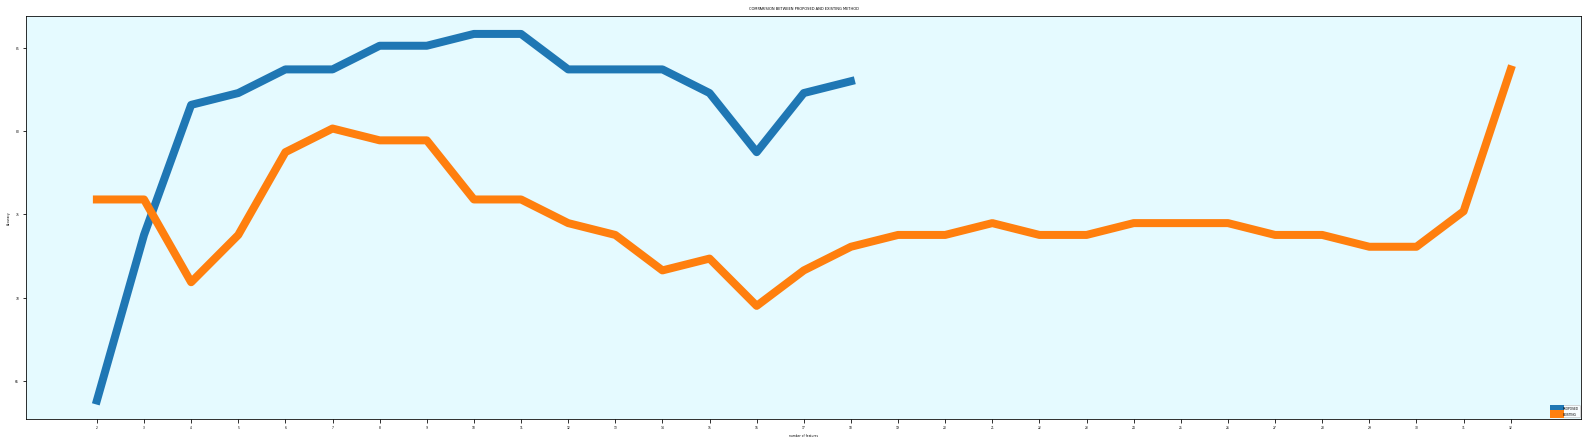

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("COMPARISION BETWEEN PROPOSED AND EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()

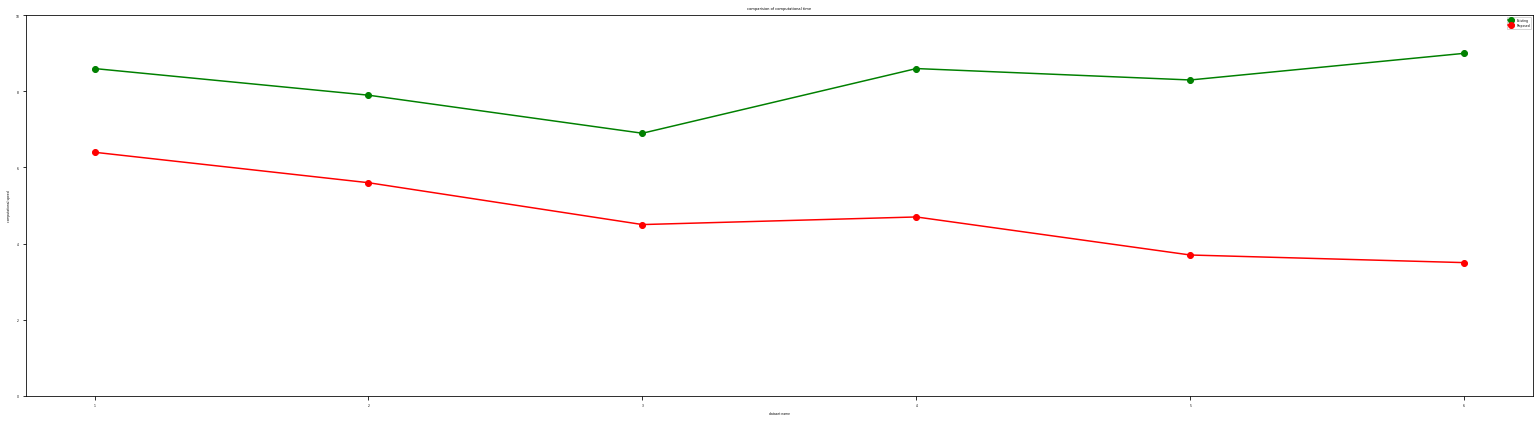

In [ ]:
emp_countA = [8.6,7.9,6.9,8.6,8.3,9.0]
emp_countB = [6.4,5.6,4.5,4.7,3.7,3.5]
year = [1,2,3,4,5,6]
plt.plot(year, emp_countA, 'o-g')
plt.plot(year, emp_countB, 'o-r')
plt.xlabel("dataset name")
plt.ylim([0,10])
plt.ylabel("computational speed")
plt.title("comparision of computational time")
plt.legend(['Existing', 'Proposed'])
plt.show()